# Import and Show the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Import data
df = pd.read_csv("/Users/cocozhang/Desktop/Obesity prediction.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

# EDA

In [6]:

plt.style.use("ggplot")

# numerical and categorical features
numerical_features = df.select_dtypes(include=["float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
categorical_features.remove("Obesity")  # Remove target variable from categorical list

# Function to create histograms
def plot_histograms(df, numerical_features):
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], bins=30, kde=True, color="royalblue")
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.grid(True)
        plt.show()

# Function to create boxplots
def plot_boxplots(df, numerical_features, target_col="Obesity"):
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[target_col], y=df[feature], hue=df[target_col], palette="coolwarm", legend=False)
        plt.xticks(rotation=45)
        plt.title(f"{feature} Distribution by {target_col}")
        plt.xlabel(target_col)
        plt.ylabel(feature)
        plt.grid(True)
        plt.show()

# Function to create count plots
def plot_categorical_counts(df, categorical_features):
    for feature in categorical_features:
        plt.figure(figsize=(4, 2))
        sns.countplot(x=df[feature], hue=df[feature], palette="viridis", order=df[feature].value_counts().index, legend=False)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# Function to check feature correlations
def plot_correlation_matrix(df):
    plt.figure(figsize=(8, 6))
    corr_matrix = df.corr(numeric_only=True)
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Feature Correlation Matrix")
    plt.show()

# Function to create pairplots
def plot_pairplot(df, numerical_features, target_col="Obesity"):
    try:
        sns.pairplot(df, vars=numerical_features, hue=target_col, palette="husl", diag_kind="kde")
        plt.show()
    except Exception as e:
        print(f"Error in pairplot: {e}")



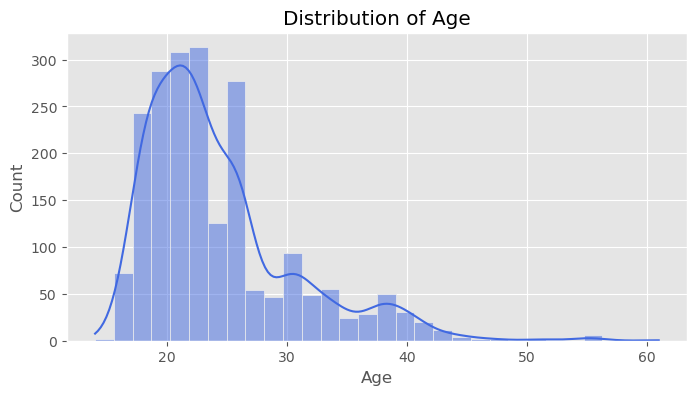

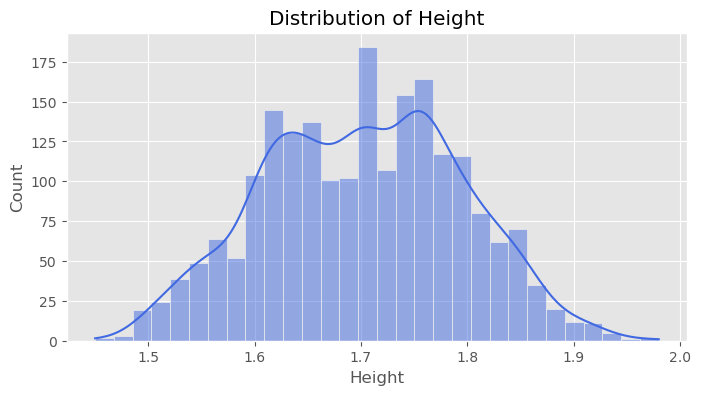

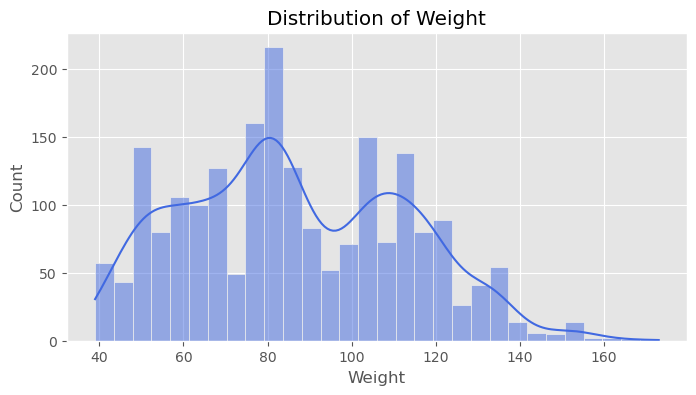

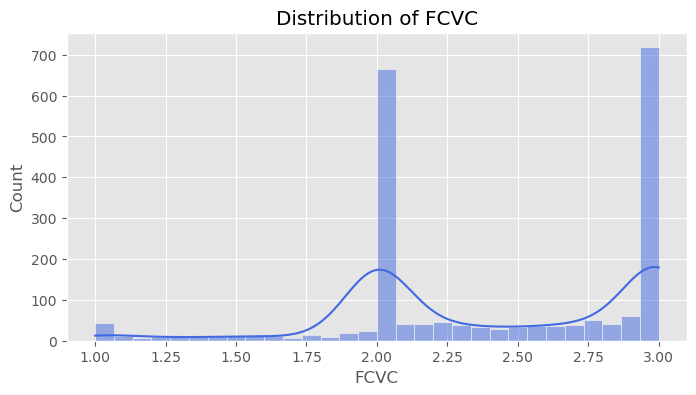

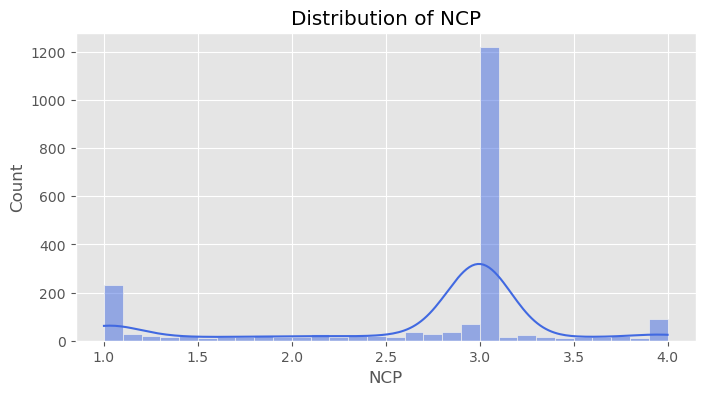

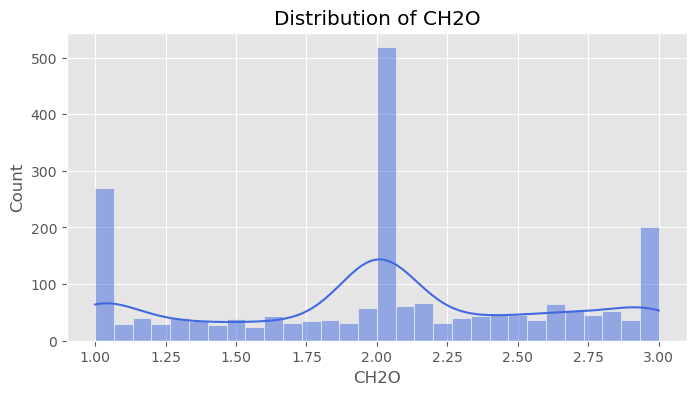

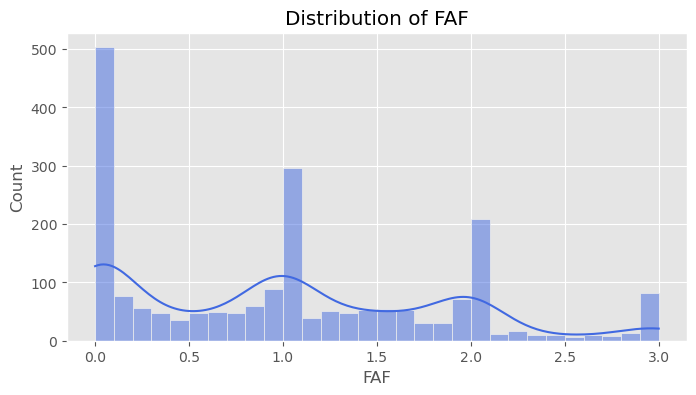

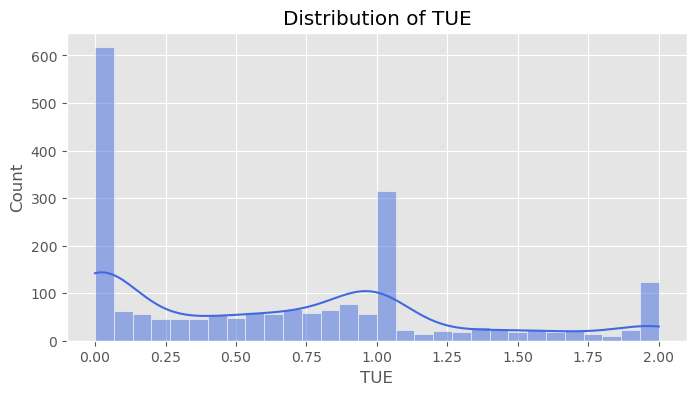

In [8]:
plot_histograms(df, numerical_features)

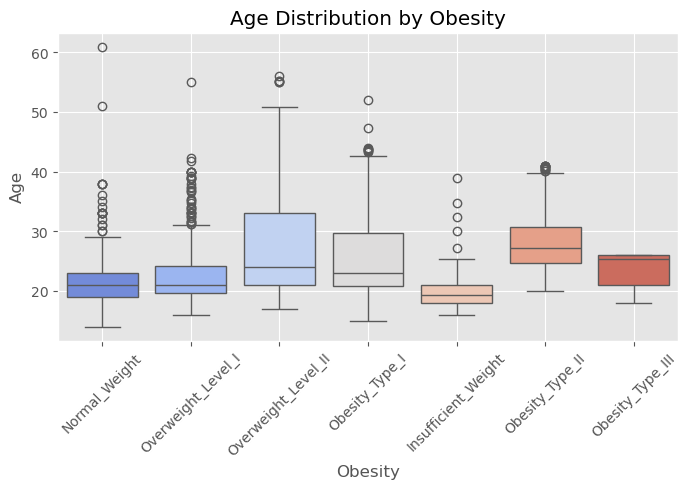

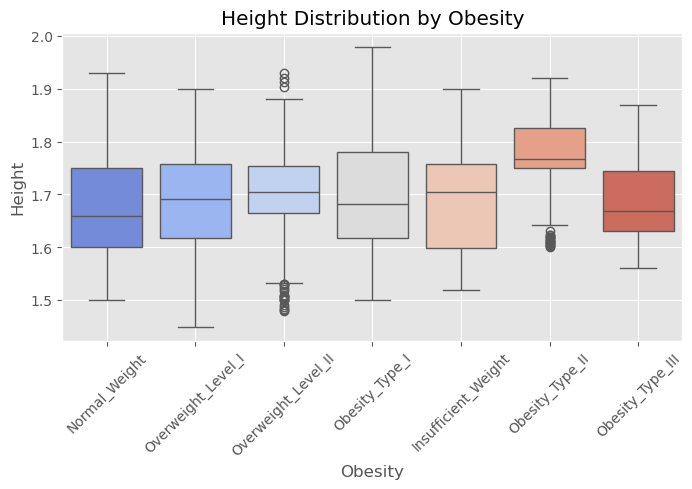

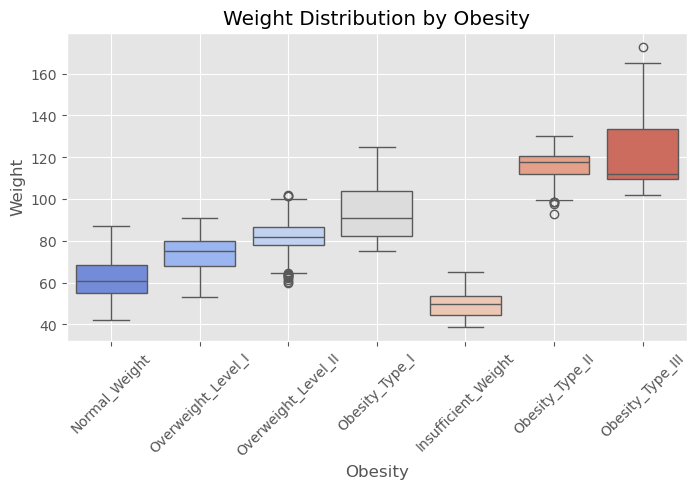

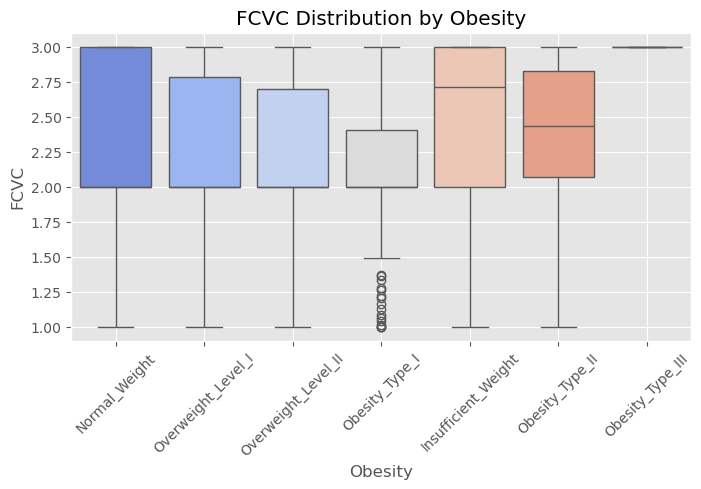

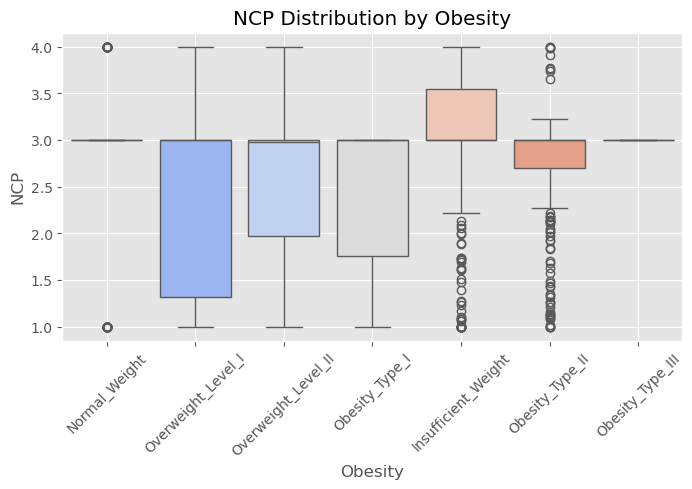

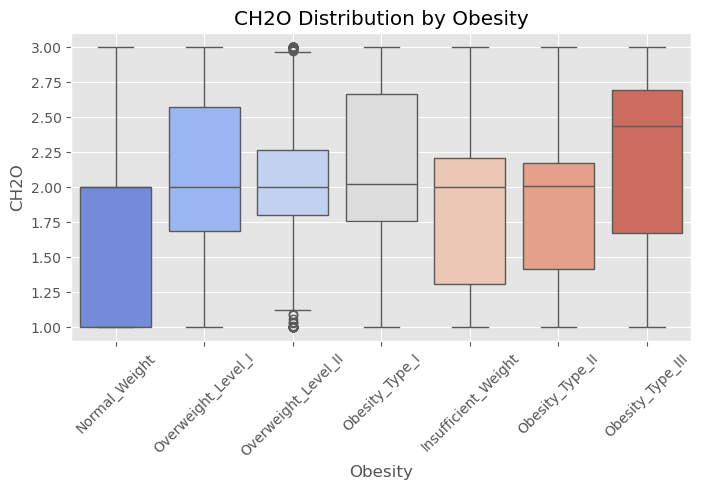

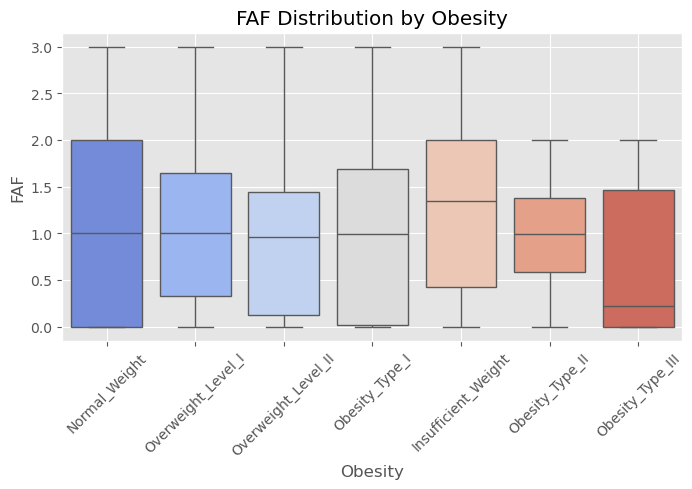

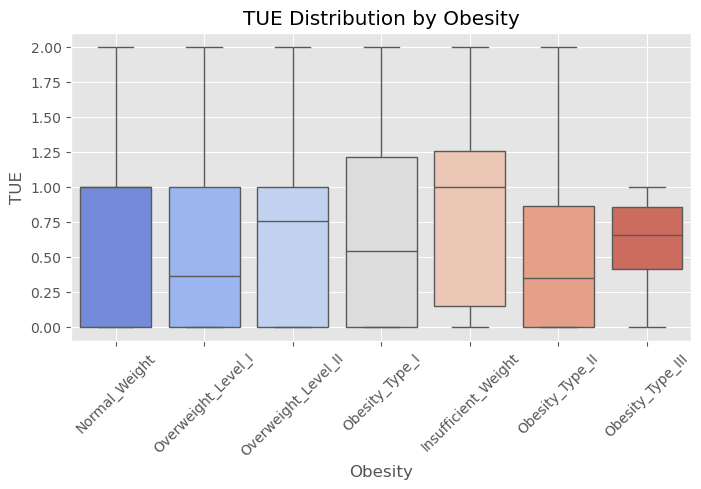

In [10]:
plot_boxplots(df, numerical_features)

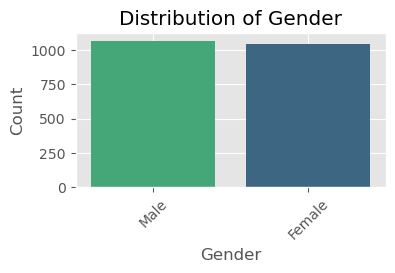

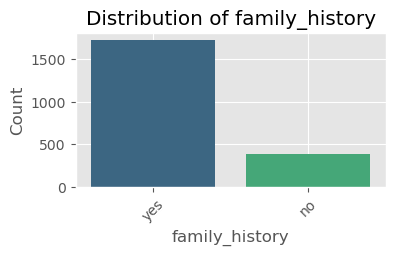

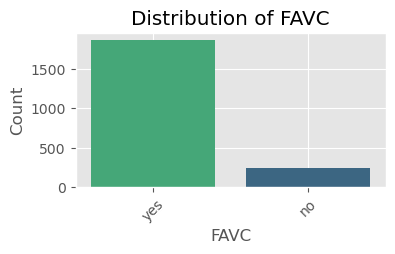

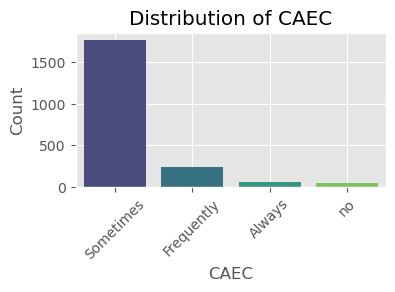

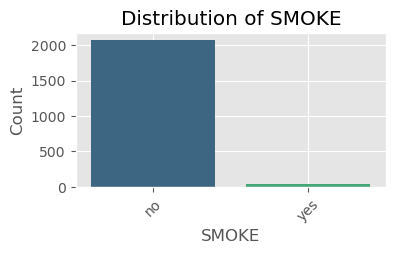

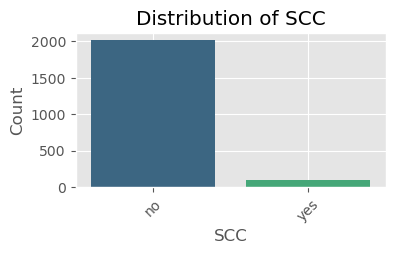

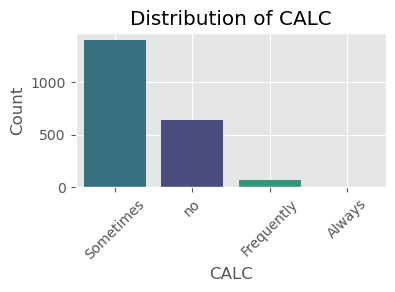

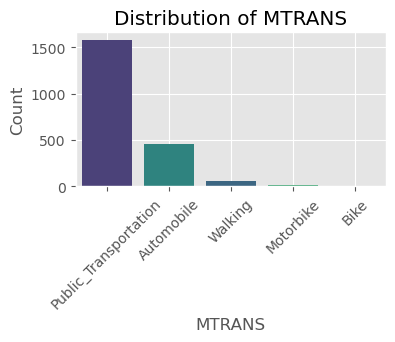

In [12]:
plot_categorical_counts(df, categorical_features)

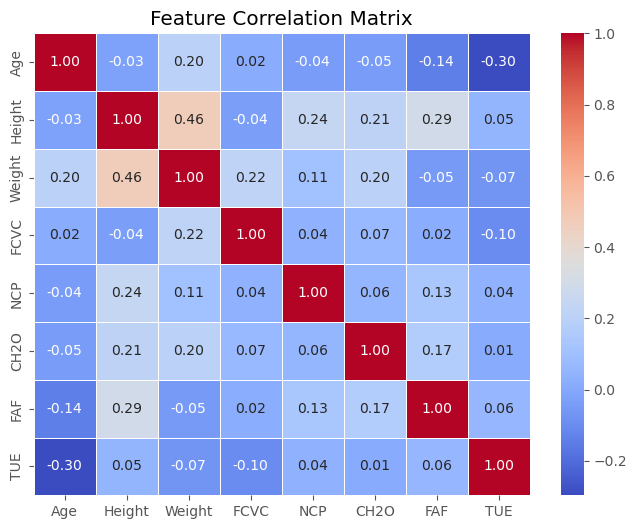

In [14]:
plot_correlation_matrix(df)

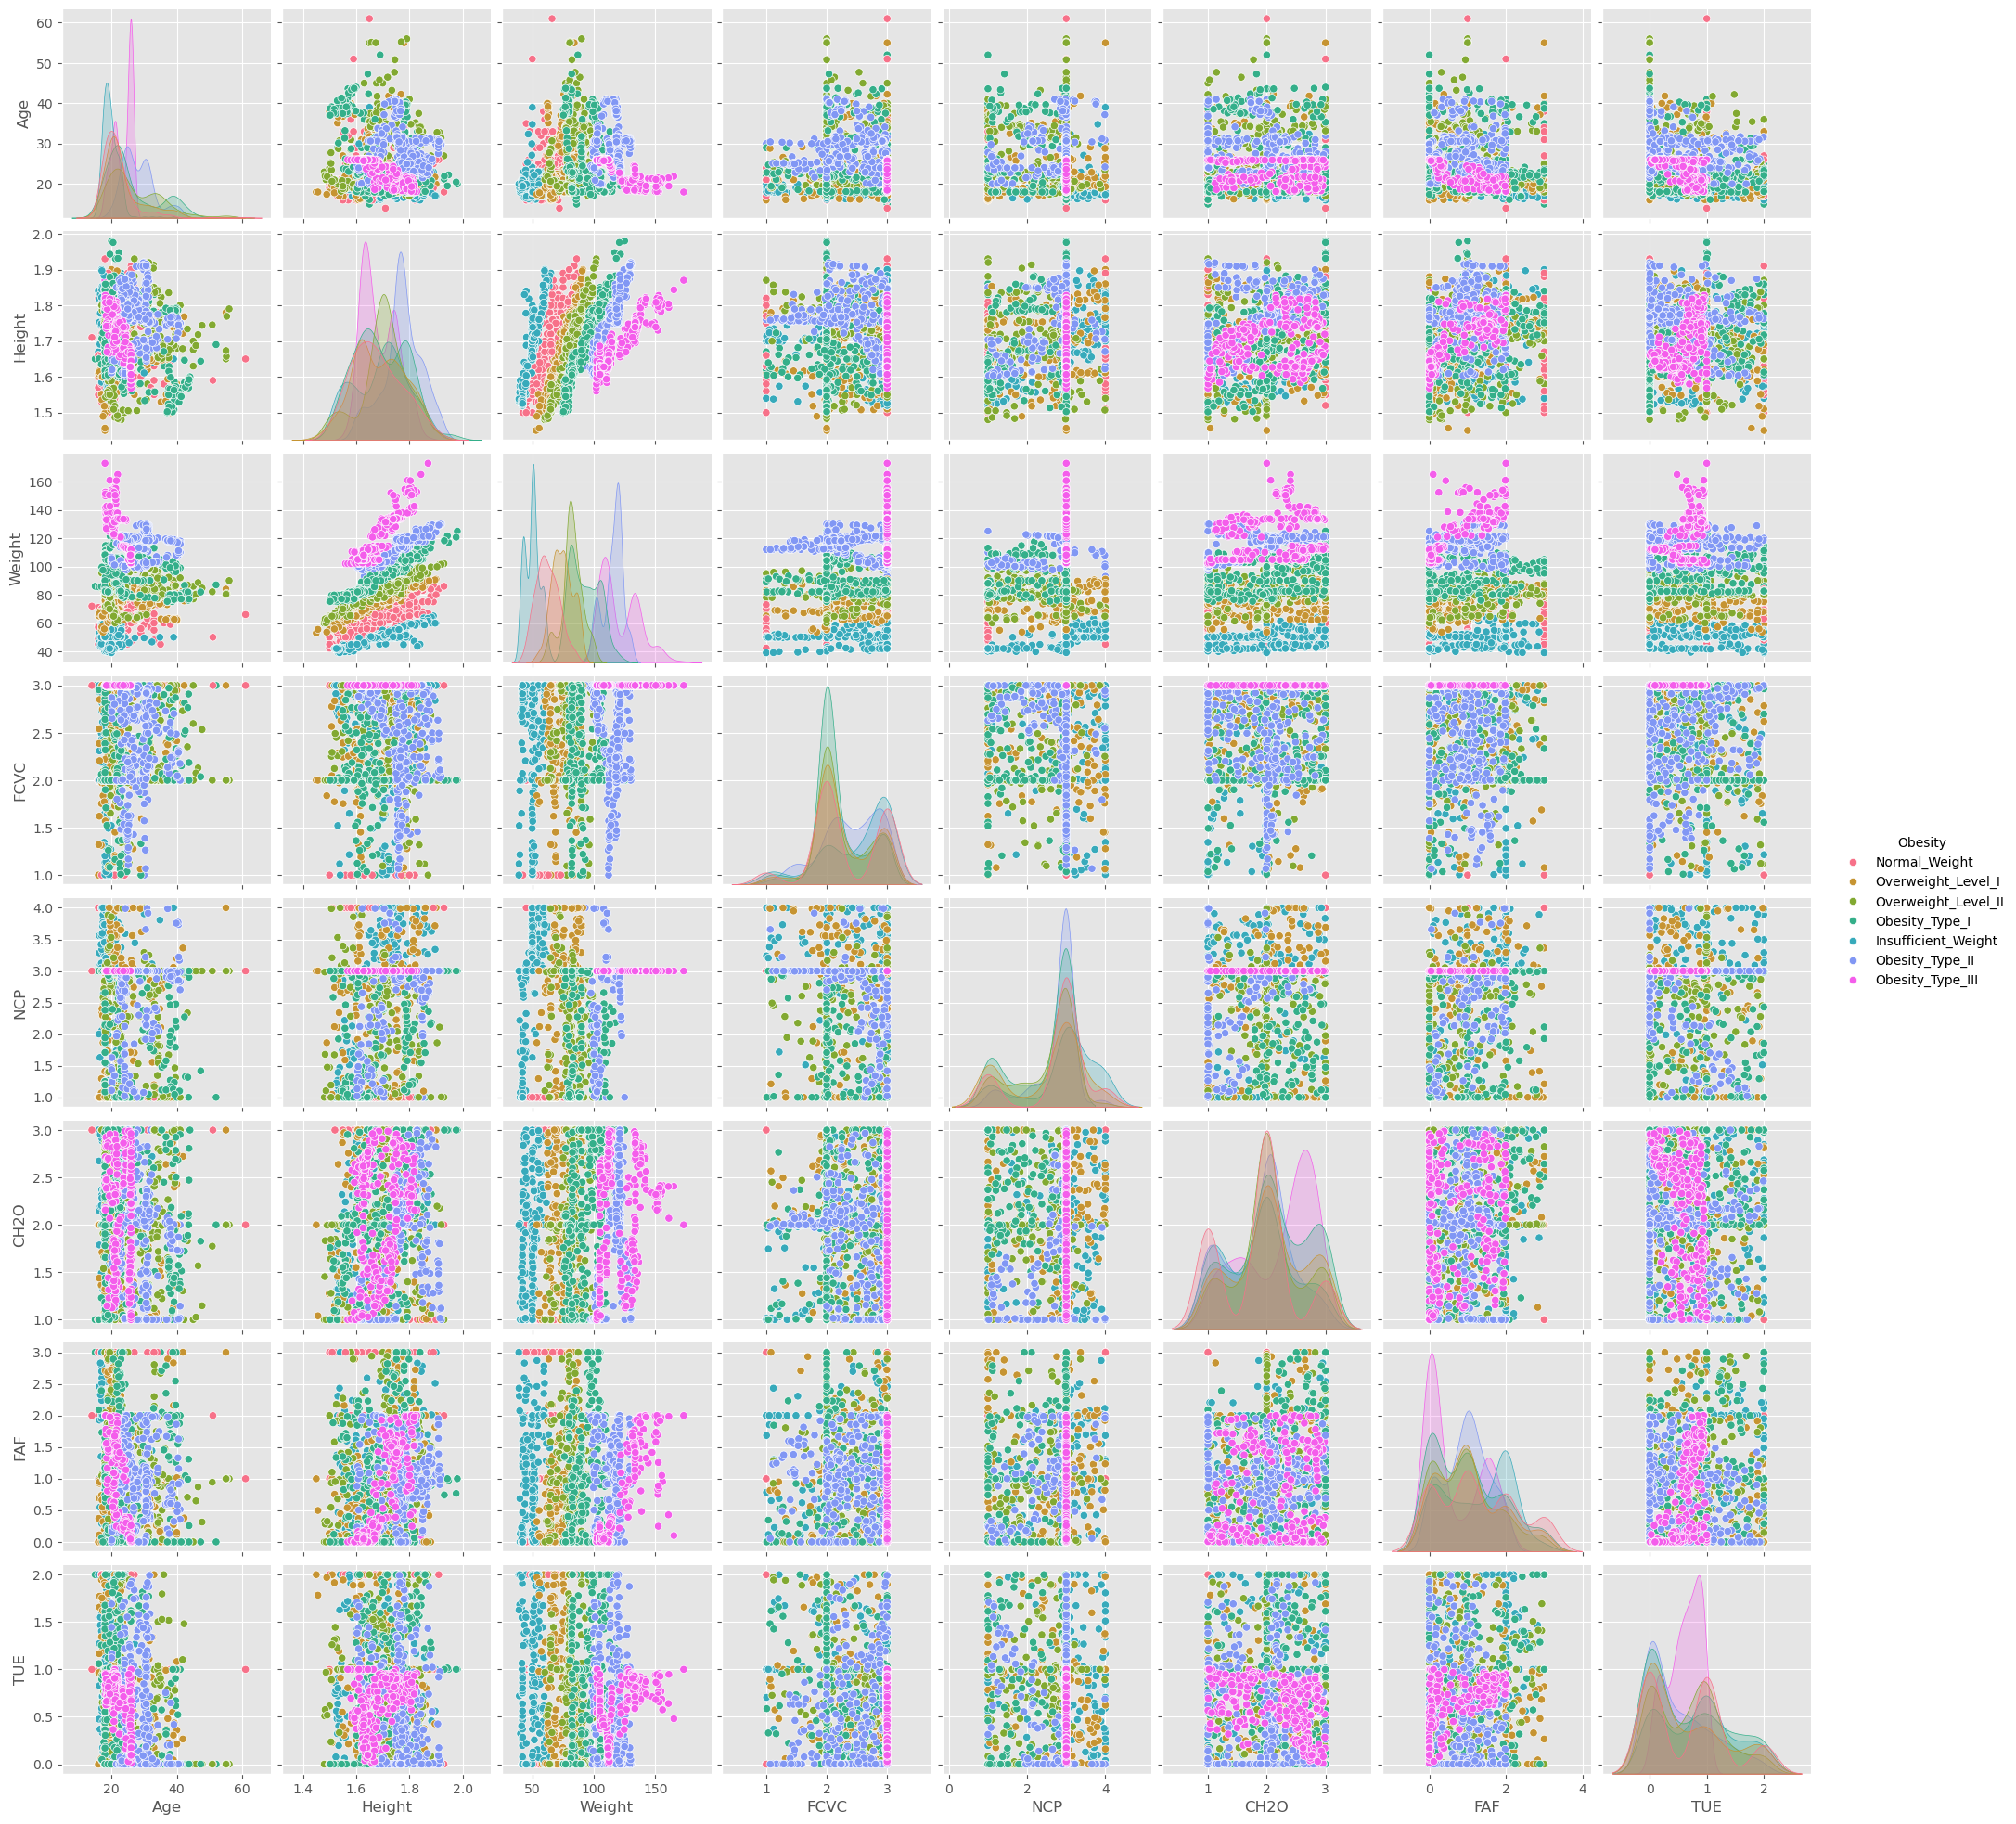

In [16]:
plot_pairplot(df, numerical_features)

# Data Preparation/Feature Engineering

In [20]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [22]:
# Encoding categorical features
label_encoders = {}
for col in categorical_features + ["Obesity"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [24]:
# Feature Engineering
# Create BMI feature
df['BMI'] = df['Weight'] / (df['Height'] ** 2)


In [26]:
# Create obesity risk factor using Family History and High-Caloric Food Consumption
df['Obesity_Risk'] = df['family_history'] * df['FAVC']

In [28]:
# Scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [36]:
# Separate features and target
X = df.drop(columns=["Obesity"])
y = df["Obesity"]

In [38]:
from sklearn.feature_selection import RFE
# Recursive Feature Elimination (RFE) for Feature Selection
estimator = LogisticRegression(random_state=42, max_iter=5000)
rfe = RFE(estimator=estimator, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Reduce the dataset to selected features
X_selected = X[selected_features]

# Splitting dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


Selected Features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CALC', 'BMI'],
      dtype='object')


In [50]:
X_train

Gender       Age    Height    Weight  family_history  FAVC      FCVC  \
459        1 -0.837360  0.625225 -0.289710               1     1 -0.785019   
426        1 -0.364507  0.518024 -0.633419               0     0 -0.785019   
326        1 -0.994977 -0.017981 -1.194810               1     1  1.088342   
971        1 -0.757544  1.316124  0.040862               1     1  0.701607   
892        0 -1.139158 -1.780173 -1.119991               0     1 -0.836452   
...      ...       ...       ...       ...             ...   ...       ...   
90         0  0.108346 -0.768388  0.244947               0     0  1.088342   
1439       0  2.575718 -1.850475 -0.260651               1     1 -0.785019   
609        1 -0.682924  0.554043 -1.206367               1     1 -0.785019   
1589       1  2.239912  0.687787  1.220058               1     1 -0.451755   
478        1 -0.837360 -0.125182 -0.824368               0     1 -0.785019   

           NCP  CALC        BMI  
459   0.404153     1  25.503616  
426   0.404153     3  22.857143  
326   0.404153     2  19.134948  
971   1.417970     2  26.334091  
892  -0.444831     2  24.281657  
...        ...   ...        ...  
90    1.689740     3  35.003199  
1439  0.404153     2  34.114665  
609   1.040325     3  17.889564  
1589  0.388278     2  38.013639  
478   0.404153     2  22.758307  

[1688 rows x 10 columns]

In [25]:
# Splitting dataset into train-test sets
X = df.drop(columns=["Obesity"])
y = df["Obesity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Final dataset preview
print("Final dataset preview:")
df.head()

Final dataset preview:


Gender       Age    Height    Weight  family_history  FAVC      FCVC  \
0       0 -0.522124 -0.875589 -0.862558               1     0 -0.785019   
1       0 -0.522124 -1.947599 -1.168077               1     0  1.088342   
2       1 -0.206889  1.054029 -0.366090               1     0 -0.785019   
3       1  0.423582  1.054029  0.015808               0     0  1.088342   
4       1 -0.364507  0.839627  0.122740               0     0 -0.785019   

        NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS  \
0  0.404153     2      0 -0.013073    0 -1.188039  0.561997     3       3   
1  0.404153     2      1  1.618759    1  2.339750 -1.080625     2       3   
2  0.404153     2      0 -0.013073    0  1.163820  0.561997     1       3   
3  0.404153     2      0 -0.013073    0  1.163820 -1.080625     1       4   
4 -2.167023     2      0 -0.013073    0 -1.188039 -1.080625     2       3   

   Obesity        BMI  Obesity_Risk  
0        1  24.386526             0  
1        1  24.238227             0  
2        1  23.765432             0  
3        5  26.851852             0  
4        6  28.342381             0

# Build the Model

In [53]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=5000)
}

In [55]:
# Hyperparameter tuning
param_grid = {
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Neural Network": {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001]}
}

tuned_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    tuned_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


In [57]:
# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    return acc

accuracies = {}
for model_name, model in tuned_models.items():
    print(f"Evaluating {model_name}...")
    accuracies[model_name] = evaluate_model(model, X_test, y_test)

Evaluating Random Forest...
Accuracy: 0.9929
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      1.00      0.99        58
           2       0.99      1.00      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98      0.99        65
           5       1.00      0.98      0.99        58
           6       1.00      0.98      0.99        58

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423

Evaluating Gradient Boosting...
Accuracy: 0.9835
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.95      1.00      0.97        58
           2       0.99      1.00      0.99        70
           3       0.98      1.00      0.99        60
           4       1.00      0.98     

# Comparison

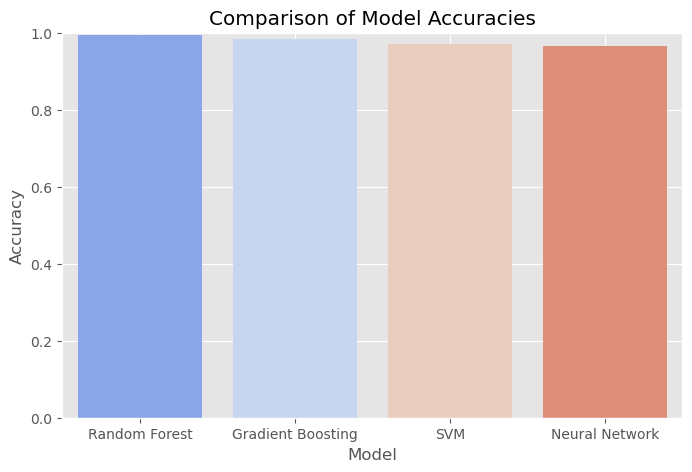

In [59]:
# Compare model performances
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), hue=list(accuracies.keys()), palette="coolwarm", legend=False)
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


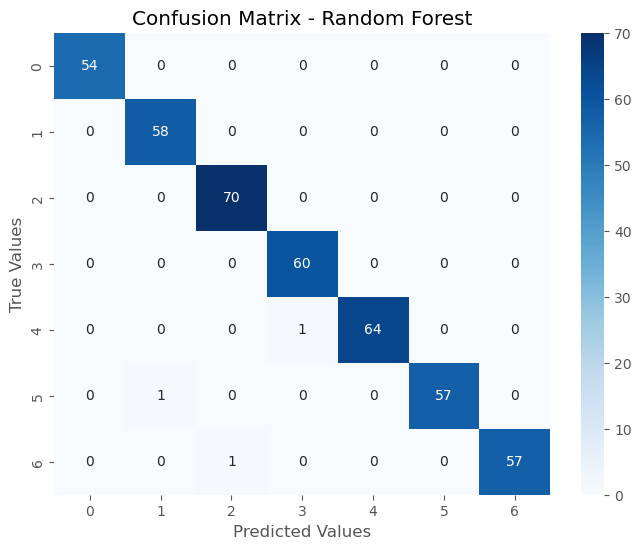

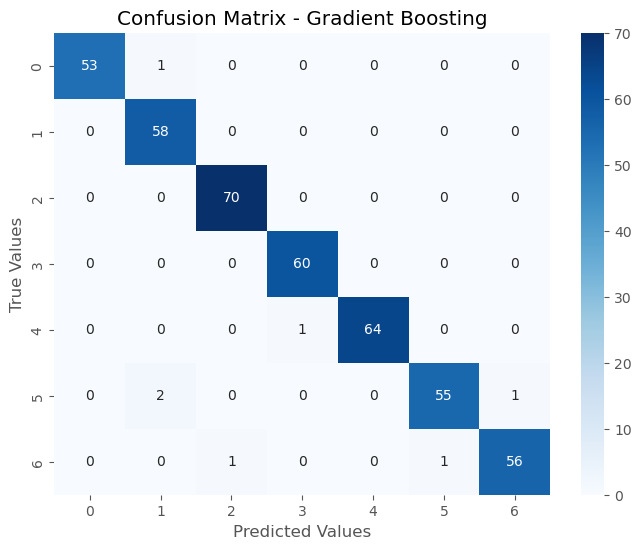

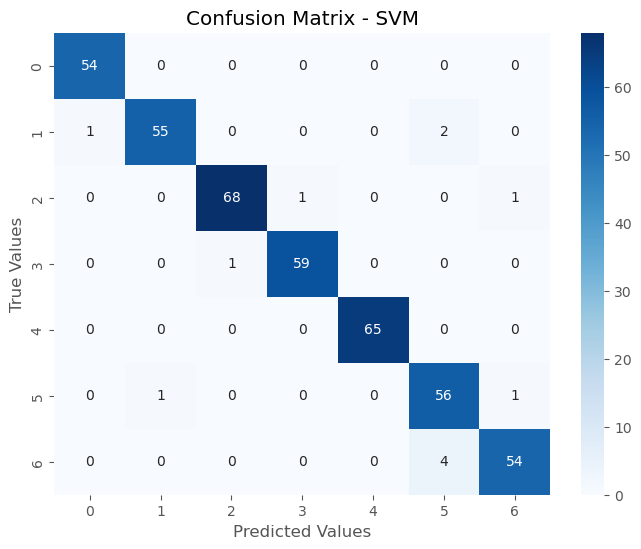

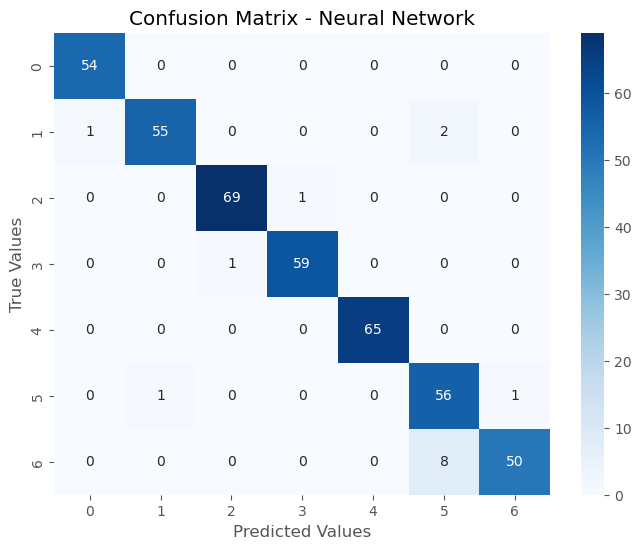

In [71]:
# Plot confusion matrices separately
def plot_confusion_matrix(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.show()

# Generate confusion matrices for each model
for model_name, model in tuned_models.items():
    plot_confusion_matrix(model, model_name)
